<a href="https://colab.research.google.com/github/tanu-yadav00/tanu_cognorise_infotech/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

read the data

In [ ]:
zip_path = "/content/CarPrice_Assignment.csv"

csv_file= 'CarPrice_Assignment.csv'

cars= pd.read_csv(csv_file)


In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.info()

In [ ]:
cars.describe()

data cleaning and data preparation

In [ ]:
cars.drop(["car_ID", "symboling"], axis = 1, inplace=True)

In [ ]:
cars["company_name"] = cars["CarName"].apply(lambda x: x.split(' ')[0])
cars.drop('CarName', axis = 1, inplace=True)

In [ ]:
cars.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
cars.company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
cars["company_name"] = cars["company_name"].str.lower()

cars["company_name"] = cars["company_name"].replace({'maxda':'mazda', 'toyouta':'toyota', 'porcshce':'porsche',
                                                     'vokswagen': 'volkswagen', 'vw':'volkswagen','Nissan':'nissan'})

In [ ]:
cars.company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#Checking for duplicates
cars.duplicated().sum()

0

visualizing the data

In [ ]:
sns.set(style = "white")
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))


sns.histplot(cars["price"], bins = 20, kde = True, color = 'skyblue', ax = axis[0])
axis[0].set_title("Distribution of price")


sns.boxplot(x = 'price', data = cars, color = 'lightcoral', ax = axis[1])
axis[1].set_title("price spread")

plt.tight_layout()
plt.show()


In [ ]:
print(cars.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


visualizing categorical data

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plot =  cars.company_name.value_counts().plot(kind = 'bar')
plt.title("Companies Frequency")
plot.set(xlabel = "Car Company", ylabel = 'Frequency')

plt.subplot(1,3,2)
plot = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title("Fuel Type Frequency")
plot.set(xlabel = "Fuel Type", ylabel = 'Frequency of fuel type')


plt.subplot(1,3,3)
plot = cars.carbody.value_counts().plot(kind = 'bar')
plt.title("Car Body Frequency")
plot.set(xlabel = "Car Body", ylabel = 'Frequency of Car Body')

plt.show()


In [ ]:
sns.set(style="whitegrid")

categorical_variables = ['company_name', 'fueltype', 'enginetype', 'carbody',
                          'doornumber', 'enginelocation', 'fuelsystem', 'cylindernumber',
                          'aspiration', 'drivewheel']

fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(10, 5 * len(categorical_variables)))

for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, data=cars, ax=axes[i])
    axes[i].set_title(f'Count plot for {variable}')
    if variable == 'company_name':
        axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Define the categorical variables to visualize
categorical_variables = ['company_name', 'fueltype', 'enginetype', 'carbody',
                          'doornumber', 'enginelocation', 'fuelsystem', 'cylindernumber',
                          'aspiration', 'drivewheel']

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(10, 5 * len(categorical_variables)))

# Plot box plots for each categorical variable against price
for i, variable in enumerate(categorical_variables):
    sns.boxplot(x=variable, y='price', data=cars, ax=axes[i])
    axes[i].set_title(f'Box plot for {variable} vs Price')
    if variable == 'company_name':
       axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

visualizing numerical data

In [ ]:
  def scatter(x, fig):
    colors = np.random.rand(cars.shape[0])
    plt.subplot(5, 2, fig)
    plt.scatter(cars[x], cars['price'], c=colors, alpha=0.7, cmap='plasma')
    plt.title(x + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(12, 18))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
scatter('wheelbase', 5)
scatter('enginesize', 6)

plt.tight_layout()
plt.show()

In [ ]:
# List of significant variables
significant_variables = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber',
                           'drivewheel', 'curbweight', 'carlength', 'carwidth', 'enginesize',
                           'boreratio', 'horsepower', 'wheelbase', 'price']

# Create a new dataframe with only the significant variables
selected_cars = cars[significant_variables].copy()

# Display the new dataframe
selected_cars.head()

,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price
0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,13495.0
1,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,16500.0
2,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5,16500.0
3,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8,13950.0
4,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4,17450.0


dummy variables

In [ ]:
#Create dummy variables for categorical columns
dummy_columns = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber', 'drivewheel']
selected_cars= pd.get_dummies(selected_cars, columns=dummy_columns, drop_first=True)

# Display the new dataframe with dummy variables
selected_cars.head()

In [ ]:
selected_cars.shape

In [ ]:
selected_cars.columns

train test split and feature scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and Target variable (y)
X = selected_cars.drop('price', axis=1)
y = selected_cars['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled features
X_train_scaled[:5]  # Displaying the first 5 rows for reference

array([[ 0.28128677,  0.07244984,  0.08381686,  0.18801047,  0.4058361 ,
        -0.81538553,  1.03708546, -0.07832604, -0.26813322,  0.64326752,
        -0.26813322, -0.2548236 , -0.13650473, -3.15171911, -0.17733173,
        -0.7200823 ,  1.05003052, -0.36198685, -0.46348119, -0.19487094,
         0.51140831, -0.372678  ,  0.        , -0.07832604, -0.13650473,
        -1.17337615,  1.26616531],
       [ 1.01604452,  1.04391556,  1.17026768, -0.15899277,  0.51738434,
        -0.24189416,  1.54123134, -0.07832604,  3.72948936, -1.55456318,
        -0.26813322, -0.2548236 , -0.13650473,  0.31728716, -0.17733173,
        -0.7200823 ,  1.05003052, -0.36198685, -0.46348119, -0.19487094,
         0.51140831, -0.372678  ,  0.        , -0.07832604, -0.13650473,
        -1.17337615,  1.26616531],
       [-0.54164191, -0.36761583, -1.09710795, -0.85299925, -1.00710835,
        -1.0647296 , -0.50896191, -0.07832604, -0.26813322,  0.64326752,
        -0.26813322, -0.2548236 , -0.13650473,  0.3172

model building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

make predictions on the scaled dataset

In [ ]:
y_pred = model.predict(X_test_scaled)

evaluate the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 10209920.152417805
R-squared (R2): 0.8706688608123747


the actual prices (y-test) vs. the predicted prices (y-predict)

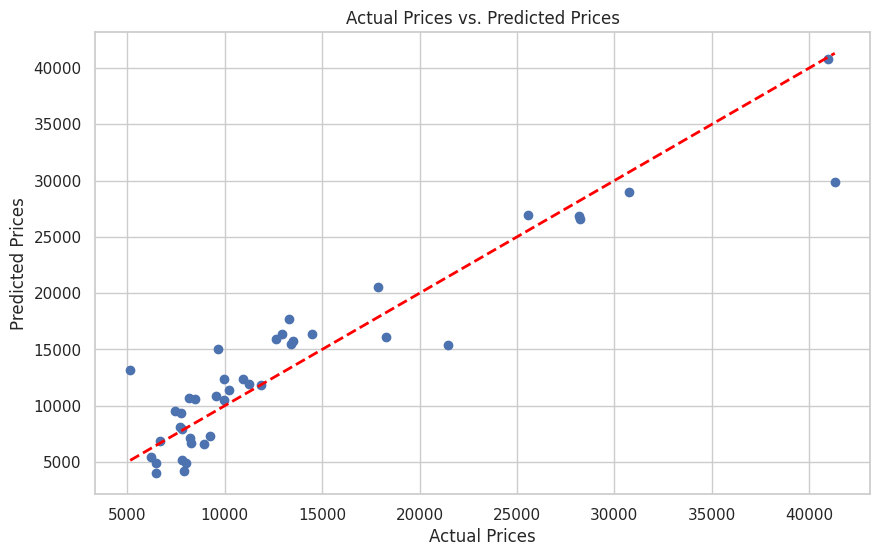

In [ ]:
 #Assuming 'y_test' is the actual prices and 'y_pred' is the predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()